# Pokemoni, prva generacija

Bavit ću se analizom svega što me zanimalo o Pokemonima te iskoristiti ovu priliku da napravim zadaću kojoj ću se moći vraćati i u budućnosti kada me nešto zaintrigira o njima.
Istražit ću njihovu jačinu, odnose i razlike, kao i bitke te pogledati postoji li povezanost između nekih karakteristika.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

pokemon=pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')

In [2]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Glasanje pokemona u crtiću

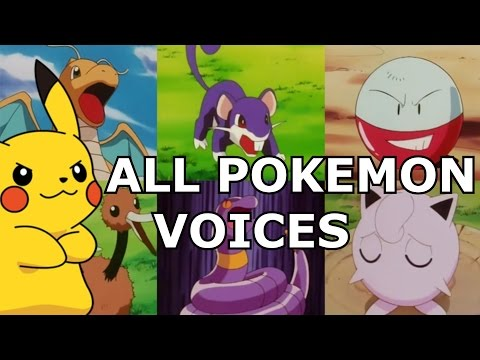

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo(id='0Q3gAObCTd0',width=900, height=500)

## Sređivanje podataka

Gledat ću samo **prvu generaciju** pokemona jer sam s njom najviše upoznata pa izbacujem suvišne podatke.

In [4]:
pokemon=pokemon[:166]

In [5]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Također u prvoj generaciji ***nismo*** imali Mega evolucije pa ću i njih izbaciti.

In [6]:
pokemon = pokemon[~pokemon['Name'].str.contains('Mega')]

In [7]:
pokemon.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [8]:
pokemon.set_index('Name', inplace=True)

## Prikaz svih pokemona s glavnim karakteristikama

In [9]:
plt.rcParams["figure.figsize"]=[12,9]

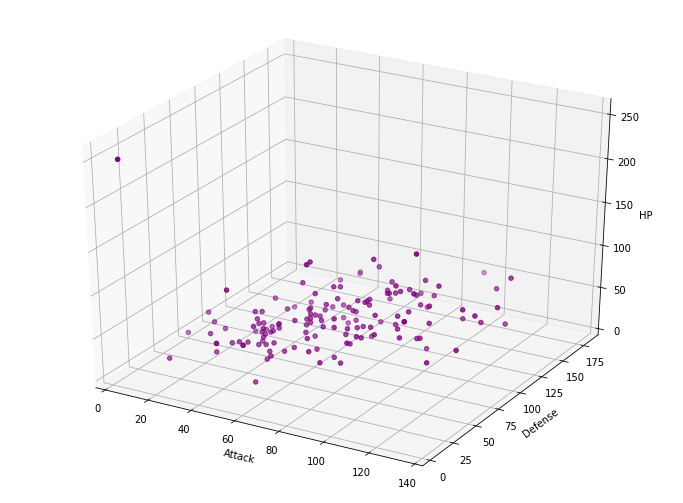

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =pokemon['Attack'].get_values()
y =pokemon['Defense'].get_values()
z =pokemon['HP'].get_values()

ax.scatter(x, y, z, c='purple', marker='o')

ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')


plt.show()

In [11]:
pokemon['HP'].max()

250

In [12]:
pokemon.loc[pokemon['HP']==250]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Chansey,113,Normal,NaN,450,250,5,5,35,105,50,1,False


Na 3D grafu najviše se ističe Chansey koja je svojom izrazito malom obranom i izrazito malim napadom, uz visoko zdravlje jako odvojena od ostalih Pokemona. Prikazat ću graf bez nje:

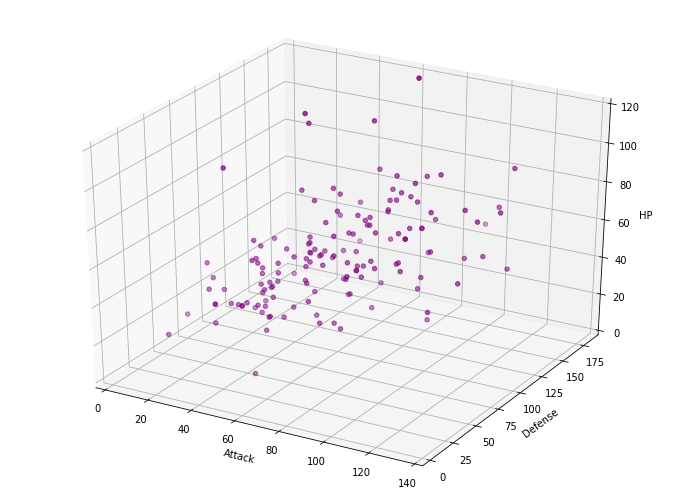

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =pokemon['Attack'].get_values()
y =pokemon['Defense'].get_values()
z =pokemon['HP'].get_values()

ax.scatter(x, y, z, c='purple', marker='o')

ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')

ax.set_zlim(0,120)

plt.show()

Vidimo da imamo Pokemona raznih kombinacija napada, obrane i zdravlja. Kasnije ću ispitati neke od tih karakteristika ovisno o tipu Pokemona.

## Funkcije bitki pokemona

Napravit ću funkciju **jednostavne** bitke koja uspoređuje pokemone prema njihovom totalu.

In [14]:
def Simple_battle(poke1,poke2):
    winner='Equally strong, no winners'
    total1=(pokemon.loc[poke1])['Total']
    total2=(pokemon.loc[poke2])['Total']
    
    if(total1<total2):
        winner=poke2
    if(total1>total2):
        winner=poke1
    return winner;

In [15]:
Simple_battle('Charmander','Charizard')

'Charizard'

In [16]:
Simple_battle('Chansey','Poliwhirl')

'Chansey'

Ipak, u bitkama Pokemona nije bitna samo "snaga" nego i prednost prema tipovima.
Napravit ću funkciju koja određuje ima li napadač prednost ili nedostatak prema svom **tipu** (gledam samo prvi tip radi jednostavnosti).

In [17]:
from IPython.display import Image
Image(url='https://i.redd.it/1oatzh4nrxqy.jpg')

Na slici su uključeni i odnosi tipova Steel, Dark i Fairy koji su dodani tek kasnije. Također, u prvoj generaciji su Psychic bili imuni na Ghost, a ne slabi.

In [18]:
def type_battle(poke1,poke2):
    winner='Attacker has no advantage or disadvantage, no winners'
    tip1=(pokemon.loc[poke1])['Type 1']
    tip2=(pokemon.loc[poke2])['Type 1']
    
    if(tip1=='Normal' and (tip2=='Rock'or tip2=='Ghost')):
        winner=poke2
        
    if(tip1=='Fire' and (tip2=='Fire' or tip2=='Water' or tip2=='Rock' or tip2=='Dragon' )):
        winner=poke2
    if(tip1=='Fire' and (tip2=='Grass' or tip2=='Ice' or tip2=='Bug' )):
        winner=poke1
    
    if(tip1=='Water' and (tip2=='Water' or tip2=='Grass' or tip2=='Dragon' )):
        winner=poke2
    if(tip1=='Water' and (tip2=='Fire' or tip2=='Ground' or tip2=='Rock')):
        winner=poke1
        
    if(tip1=='Electric' and (tip2=='Electric' or tip2=='Grass' or tip2=='Ground' or tip2=='Dragon' )):
        winner=poke2
    if(tip1=='Electric' and (tip2=='Water' or tip2=='Flying')):
        winner=poke1
    
    if(tip1=='Grass' and (tip2=='Fire'or tip2=='Grass' or tip2=='Poison' or tip2=='Flying' or tip2=='Bug' or tip2=='Dragon' )):
        winner=poke2
    if(tip1=='Grass' and (tip2=='Water' or tip2=='Ground' or tip2=='Rock' )):
        winner=poke1
        
    if(tip1=='Ice' and (tip2=='Fire' or tip2=='Water' or tip2=='Ice' )):
        winner=poke2
    if(tip1=='Ice' and (tip2=='Grass' or tip2=='Ground' or tip2=='Flying' or tip2=='Dragon' )):
        winner=poke1
        
    if(tip1=='Fighting' and (tip2=='Poison' or tip2=='Fly' or tip2=='Psychic' or tip2=='Bug' or tip2=='Ghost')):
        winner=poke2
    if(tip1=='Fighting' and (tip2=='Normal' or tip2=='Ice' or tip2=='Rock' )):
        winner=poke1
    
    if(tip1=='Poison' and (tip2=='Poison' or tip2=='Ground' or tip2=='Rock' or tip2=='Ghost')):
        winner=poke2
    if(tip1=='Poison' and (tip2=='Grass')):
        winner=poke1
    
    if(tip1=='Ground' and (tip2=='Grass' or tip2=='Fly' or tip2=='Bug')):
        winner=poke2
    if(tip1=='Ground' and (tip2=='Fire' or tip2=='Electric' or tip2=='Poison' or tip2=='Rock' )):
        winner=poke1
    
    if(tip1=='Flying' and (tip2=='Electric' or tip2=='Rock')):
        winner=poke2
    if(tip1=='Flying' and (tip2=='Grass' or tip2=='Fighting' or tip2=='Bug')):
        winner=poke1
    
    if(tip1=='Psychic' and (tip2=='Psychic' )):
        winner=poke2
    if(tip1=='Psychic' and (tip2=='Fighting' or tip2=='Poison' )):
        winner=poke1
        
    if(tip1=='Bug' and (tip2=='Fire' or tip2=='Fighting' or tip2=='Poison' or tip2=='Flying' or tip2=='Ghost')):
        winner=poke2
    if(tip1=='Bug' and (tip2=='Grass' or tip2=='Psychic')):
        winner=poke1
    
    if(tip1=='Rock' and (tip2=='Fighting' or tip2=='Ground')):
        winner=poke2
    if(tip1=='Rock' and (tip2=='Fire' or tip2=='Ice' or tip2=='Fly' or tip2=='Bug')):
        winner=poke1
    
    if(tip1=='Ghost' and (tip2=='Psychic')):
        winner=poke2
    if(tip1=='Ghost' and (tip2=='Fighting')):
        winner=poke1
    
    if(tip1=='Dragon' and (tip2=='Dragon')):
        winner=poke1
    

    return winner

In [19]:
type_battle('Squirtle','Pikachu')

'Attacker has no advantage or disadvantage, no winners'

In [20]:
type_battle('Pikachu','Squirtle')

'Pikachu'

U primjeru Pikachua i Squirtlea vidimo da prednost ima Pikachu samo kada napada, jer električni napadi na vodene tipove kao što je Squirtle djeluju jače nego uobičajeno, ali kada Squirtle napada, vodeni napadi na Pikachua ne djeluju niti slabije niti jače od uobičajenoga pa on kao napadač nema nikakvu prednost ni nedostatak.

Napravit ću **bitku** koja malo bolje prikazuje odnos snaga uključujući njihov **total i prednost prema tipu**.

In [21]:
def battle(poke1,poke2):
    winner='No winners'
    total1=(pokemon.loc[poke1])['Total']
    total2=(pokemon.loc[poke2])['Total']
    total3=0
    total4=0
    
    
    if(Simple_battle(poke1,poke2)=='Equally strong, no winners'):
        winner=type_battle(poke1,poke2)
        
    elif(type_battle(poke1,poke2)=='Attacker has no advantage or disadvantage, no winners'):
        winner=Simple_battle(poke1,poke2)
        
    else:
    
        if(type_battle(poke1,poke2)==poke1):
            total4=total2*0.8
            total3=total1
            
        if(type_battle(poke1,poke2)==poke2):
            total3=total1*0.8
            total4=total2
            
        if(total3<total4):
            winner=poke2
            
        if(total3>total4): 
            winner=poke1
            

    return winner

In [22]:
battle('Charizard','Squirtle')

'Charizard'

Unatoč tome što je Charizard slabiji po tipu jer je vatreni pokemon, a Squirtle vodeni, on je jači i kada mu umanjimo Total score.

In [23]:
battle('Horsea','Onix')

'Onix'

In [24]:
battle('Butterfree','Psyduck')

'Butterfree'

## Analiza tipova pokemona

In [25]:
pokemon_grass=pokemon[pokemon['Type 1']=='Grass']
pokemon_grass=pokemon_grass.append(pokemon[pokemon['Type 2']=='Grass'])

pokemon_bug=pokemon[(pokemon['Type 1']=='Bug') | (pokemon['Type 2']=='Bug')]
pokemon_dragon=pokemon[(pokemon['Type 1']=='Dragon') | (pokemon['Type 2']=='Dragon')]
pokemon_ice=pokemon[(pokemon['Type 1']=='Ice') | (pokemon['Type 2']=='Ice')]
pokemon_fighting=pokemon[(pokemon['Type 1']=='Fighting') | (pokemon['Type 2']=='Fighting')]
pokemon_fire=pokemon[(pokemon['Type 1']=='Fire') | (pokemon['Type 2']=='Fire')]
pokemon_water=pokemon[(pokemon['Type 1']=='Water') | (pokemon['Type 2']=='Water')]
pokemon_ground=pokemon[(pokemon['Type 1']=='Ground') | (pokemon['Type 2']=='Ground')]
pokemon_psychic=pokemon[(pokemon['Type 1']=='Psychic') | (pokemon['Type 2']=='Psychic')]
pokemon_poison=pokemon[(pokemon['Type 1']=='Poison') | (pokemon['Type 2']=='Poison')]
pokemon_rock=pokemon[(pokemon['Type 1']=='Rock') | (pokemon['Type 2']=='Rock')]
pokemon_normal=pokemon[(pokemon['Type 1']=='Normal') | (pokemon['Type 2']=='Normal')]
pokemon_electric=pokemon[(pokemon['Type 1']=='Electric') | (pokemon['Type 2']=='Electric')]
pokemon_flying=pokemon[(pokemon['Type 1']=='Flying') | (pokemon['Type 2']=='Flying')]
pokemon_ghost=pokemon[(pokemon['Type 1']=='Ghost') | (pokemon['Type 2']=='Ghost')]

### Udio tipova pokemona

In [26]:
tip=[('fighting',len(pokemon_fighting)),('grass',len(pokemon_grass)),('bug',len(pokemon_bug)),('rock',len(pokemon_rock)),
       ('ground',len(pokemon_ground)) ,('psychic',len(pokemon_psychic)), ('electric',len(pokemon_electric)),
       ('normal',len(pokemon_normal)), ('fire',len(pokemon_fire)),('ice',len(pokemon_ice)),('ghost',len(pokemon_ghost)),
      ('water',len(pokemon_water)),('flying',len(pokemon_flying)),('dragon',len(pokemon_dragon)),('poison',len(pokemon_poison))]

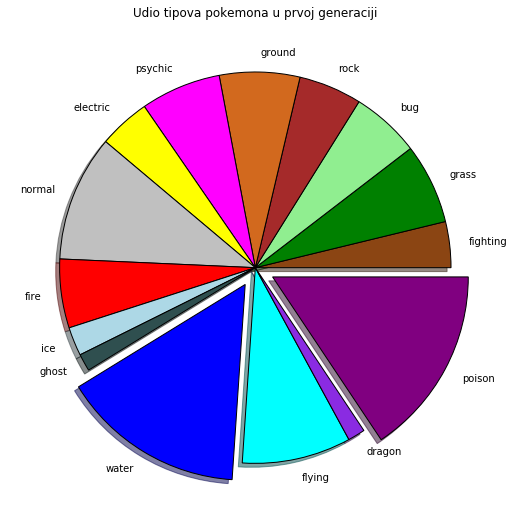

In [27]:
sizes=[i[1] for i in tip]
labels =[i[0] for i in tip]
explode = (0, 0, 0, 0,0,0,0,0,0,0,0,0.1,0,0,0.1)
colors=('saddlebrown','green','lightgreen','brown','chocolate','fuchsia','yellow','silver','red','lightblue','darkslategrey',
       'blue','aqua','blueviolet','purple')
plt.pie(sizes, labels=labels,explode=explode,colors=colors,shadow=True,wedgeprops={'linewidth':1,'edgecolor' : "black"})
plt.title('Udio tipova pokemona u prvoj generaciji')
plt.show()

Najviše su zastupljeni vodeni i otrovni pokemoni, a najmanje duhovi i zmajevi.

### Zdravlje po tipovima

In [28]:
zdravlje=[('fighting',pokemon_fighting['HP'].mean()),('grass',pokemon_grass['HP'].mean()),('bug',pokemon_bug['HP'].mean()),('rock',pokemon_rock['HP'].mean()),
       ('ground',pokemon_ground['HP'].mean()) ,('psychic',pokemon_psychic['HP'].mean()), ('electric',pokemon_electric['HP'].mean()),
       ('normal',pokemon_normal['HP'].mean()), ('fire',pokemon_fire['HP'].mean()),('ice',pokemon_ice['HP'].mean()),('ghost',pokemon_ghost['HP'].mean()),
      ('water',pokemon_water['HP'].mean()),('flying',pokemon_flying['HP'].mean()),('dragon',pokemon_dragon['HP'].mean()),('poison',pokemon_poison['HP'].mean())]

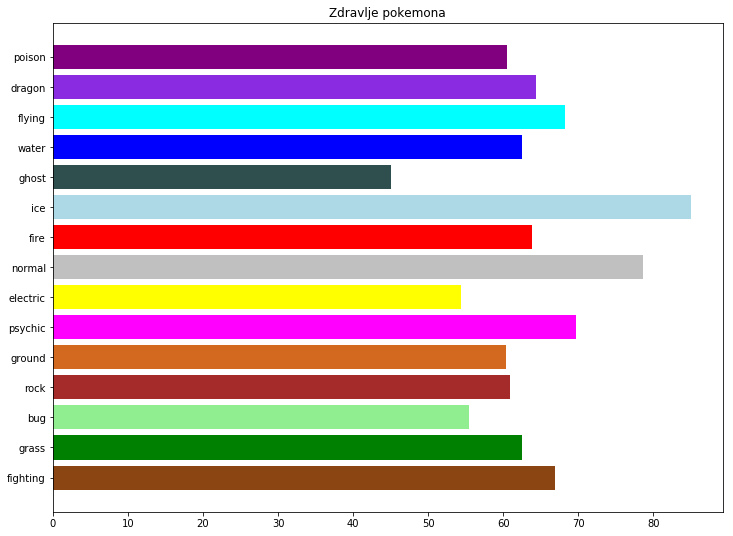

In [29]:
velicina=[i[1] for i in zdravlje]
ime=[i[0] for i in zdravlje]

plt.barh(ime,velicina,color=colors)
plt.title('Zdravlje pokemona')
plt.show()

Najveće zdravlje imaju ledeni pokemoni, a blizu na drugom mjestu su normalni. Najgore zdravlje imaju duhovi. Taj rezultat me pomalo iznenađuje jer nikad nisam obraćala pozornost na to te sam očekivala da će svi biti podjednaki.
Ipak, ledenih pokemona ima malo u prvoj generaciji (samo 5) te je jedan od njih legendarni Articuno, a legendarni pokemoni inače imaju bolje karakteristike od ostalih pa to dosta utječe na rezultat. Zbog toga ne bi bilo krivo smatrati da su normalni pokemoni nadmoćniji u zdravlju jer ih ima dosta (22) te su unatoč tome visoko na ljestvici zdravlja.

## Monotipovi i dualtipovi

In [30]:
pokemon_monotype=pokemon[pd.isna(pokemon['Type 2'])]
pokemon_dualtype=pokemon[pd.notna(pokemon['Type 2'])]

In [31]:
pokemon_monotype.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Squirtle,7,Water,NaN,314,44,48,65,50,64,43,1,False
Wartortle,8,Water,NaN,405,59,63,80,65,80,58,1,False
Blastoise,9,Water,NaN,530,79,83,100,85,105,78,1,False


In [32]:
pokemon_dualtype.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Butterfree,12,Bug,Flying,395,60,45,50,90,80,70,1,False


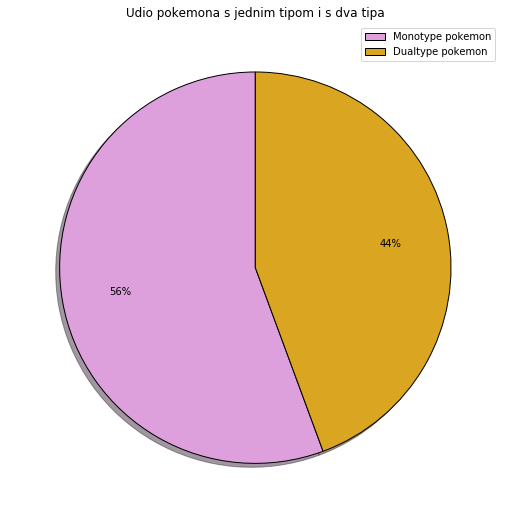

In [33]:
udio=[('Monotype pokemon',len(pokemon_monotype)),('Dualtype pokemon', len(pokemon_dualtype))]
vel=[udio[0][1], udio[1][1]]
oznaka =[udio[0][0], udio[1][0]]
colors=('plum','goldenrod')
plt.pie(vel,colors=colors, shadow=True,startangle=90, autopct='%.0f%%',pctdistance=0.7,
        wedgeprops={'linewidth':1,'edgecolor' : "black"})
plt.title('Udio pokemona s jednim tipom i s dva tipa')
plt.legend(oznaka)

plt.show()

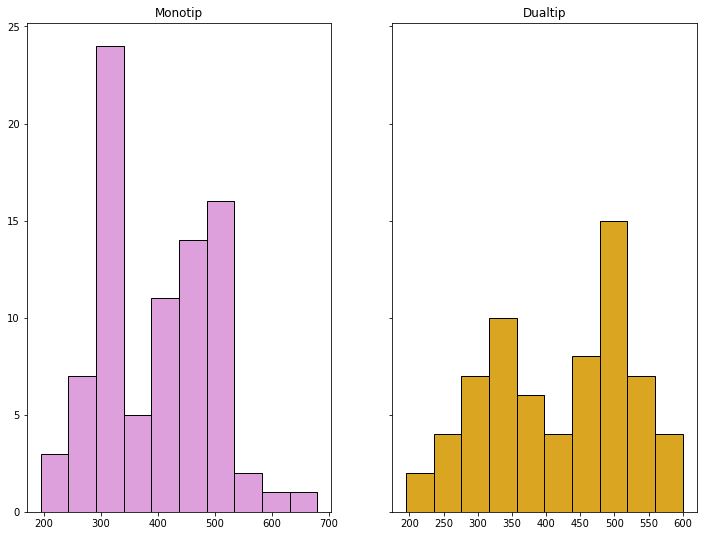

In [34]:
fig1,(lijevo, desno) = plt.subplots(1, 2, sharey=True)
lijevo.hist(pokemon_monotype['Total'],color='plum', ec='black')
lijevo.set(title='Monotip')

desno.hist(pokemon_dualtype['Total'],color='goldenrod', ec='black')
desno.set(title='Dualtip')
plt.show()

Na histogramu vidimo da ima dosta slabih monotipova, a manje jačih, dok je histogram dualtipova malo teži s desne strane.

In [35]:
pokemon_monotype['Total'].mean()

397.2261904761905

In [36]:
pokemon_dualtype['Total'].mean()

419.43283582089555

In [37]:
pokemon_monotype['Total'].median()

405.0

In [38]:
pokemon_dualtype['Total'].median()

442.0

Iz medijana i prosjeka vidimo da su ipak pokemoni monotipi nešto slabiji od dualtipova. To se može objasniti činjenicom da dosta evolucija dobije drugi tip, a naravno da su evolucije jače od svojih prethodnika. Npr. Charmander i Charmeleon su samo vatreni tipovi, a njihova treća evolucija Charizard je vatreni i leteći tip. Isto tako Staryu je samo vodeni pokemon, ali njezina evolucija Starmie je vodeni i psihički tip.

## Jačina pokemona

In [39]:
pokemon['Total'].min()

195

In [40]:
pokemon.loc[pokemon['Total']==195]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Caterpie,10,Bug,NaN,195,45,30,35,20,20,45,1,False
Weedle,13,Bug,Poison,195,40,35,30,20,20,50,1,False


In [41]:
pokemon['Total'].max()

680

In [42]:
pokemon.loc[pokemon['Total']==680]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Mewtwo,150,Psychic,NaN,680,106,110,90,154,90,130,1,True


Najjači pokemon je **Mewtwo**, a najslabiji su **Caterpie i Weedle**.

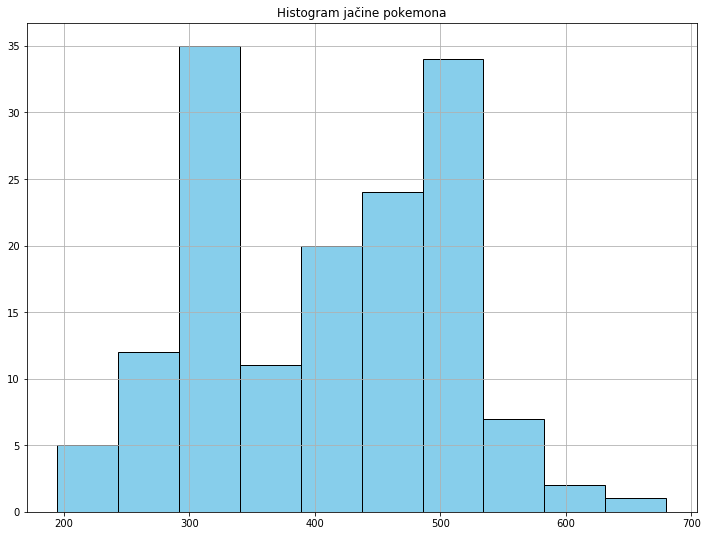

In [43]:
pokemon['Total'].hist(color='skyblue',ec='black')
plt.title('Histogram jačine pokemona')
plt.show()

Total stats možemo poistovjetiti s jačinom pokemona. Dobila sam bimodalni histogram koji nam prikazuje da najviše pokemona ima total 300 i 500 koji najčešće odgovaraju prvoj i drugoj evoluciji pokemona (ako nema treće, naravno) te su takvi najviše zastupljeni u prvoj generaciji.

### Usporedba napada Fighting tipova i ostalih pokemona

Kaže se da je glavna prednost **Fighting** tipova ta što imaju jači **napad** u usporedbi s ostalima pa ću to provjeriti običnom aritmetičkom sredinom.

C:\Users\Korisnik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


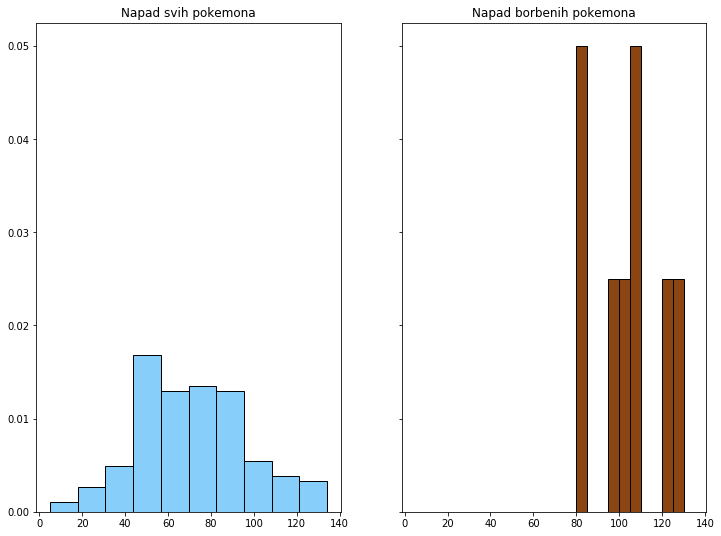

In [44]:
bez_borbenih=pokemon[~(pokemon['Type 1']=='Fighting') & ~(pokemon['Type 2']=='Fighting')]

fig2,(lijevo, desno) = plt.subplots(1, 2, sharey=True,sharex=True)
lijevo.hist((bez_borbenih['Attack']),color='lightskyblue',ec='black',normed=1)
lijevo.set(title='Napad svih pokemona')
desno.hist(pokemon_fighting['Attack'],color='saddlebrown',ec='black',normed=1)
desno.set(title='Napad borbenih pokemona')
plt.show()

In [45]:
len(pokemon_fighting)

8

In [46]:
len(bez_borbenih)

143

Zbog velike razlike u uzorku borbenih (fighting) pokemona i ostalih, histogrami ne izgledaju lijepo, ali generalno vidimo da postoji opravdana sumnja da borbeni stvarno imaju jači napad od ostalih.

### T-test

H0 = prosjek napada *borbenih* pokemona je jednak prosjeku napada *ostalih* pokemona  
H1 = nije jednak

In [47]:
stats.ttest_ind(bez_borbenih['Attack'],pokemon_fighting['Attack'], equal_var = False)

Ttest_indResult(statistic=-4.716841643885219, pvalue=0.0011487984515828927)

p-vrijednost je jako malena, što znači da odbacujemo H0 hipotezu, tj postoji značajna razlika u prosjecima te dvije skupine, a pogledom na histogram je očito da je napad borbenih veći.

In [48]:
pokemon_fighting['Attack'].median()

102.5

In [49]:
bez_borbenih['Attack'].median()

70.0

Usporedbom medijana dolazimo do istog zaključka te je to nekad bolji način gledanja na podatke jer prosjek zna biti iskrivljen s jako malim i jako velikim vrijednostima.

### Usporedba Special attacka i Attacka

In [50]:
sp_atk=[('fighting',pokemon_fighting['Sp. Atk'].mean()),('grass',pokemon_grass['Sp. Atk'].mean()),('bug',pokemon_bug['Sp. Atk'].mean()),('rock',pokemon_rock['Sp. Atk'].mean()),
       ('ground',pokemon_ground['Sp. Atk'].mean()) ,('psychic',pokemon_psychic['Sp. Atk'].mean()), ('electric',pokemon_electric['Sp. Atk'].mean()),
       ('normal',pokemon_normal['Sp. Atk'].mean()), ('fire',pokemon_fire['Sp. Atk'].mean()),('ice',pokemon_ice['Sp. Atk'].mean()),('ghost',pokemon_ghost['Sp. Atk'].mean()),
      ('water',pokemon_water['Sp. Atk'].mean()),('flying',pokemon_flying['Sp. Atk'].mean()),('dragon',pokemon_dragon['Sp. Atk'].mean()),('poison',pokemon_poison['Sp. Atk'].mean())]

In [51]:
atk=[('fighting',pokemon_fighting['Attack'].mean()),('grass',pokemon_grass['Attack'].mean()),('bug',pokemon_bug['Attack'].mean()),('rock',pokemon_rock['Attack'].mean()),
       ('ground',pokemon_ground['Attack'].mean()) ,('psychic',pokemon_psychic['Attack'].mean()), ('electric',pokemon_electric['Attack'].mean()),
       ('normal',pokemon_normal['Attack'].mean()), ('fire',pokemon_fire['Attack'].mean()),('ice',pokemon_ice['Attack'].mean()),('ghost',pokemon_ghost['Attack'].mean()),
      ('water',pokemon_water['Attack'].mean()),('flying',pokemon_flying['Attack'].mean()),('dragon',pokemon_dragon['Attack'].mean()),('poison',pokemon_poison['Attack'].mean())]

In [52]:
s_velicina=[i[1] for i in sp_atk]
a_velicina=[i[1] for i in atk]
ime=[i[0] for i in sp_atk]

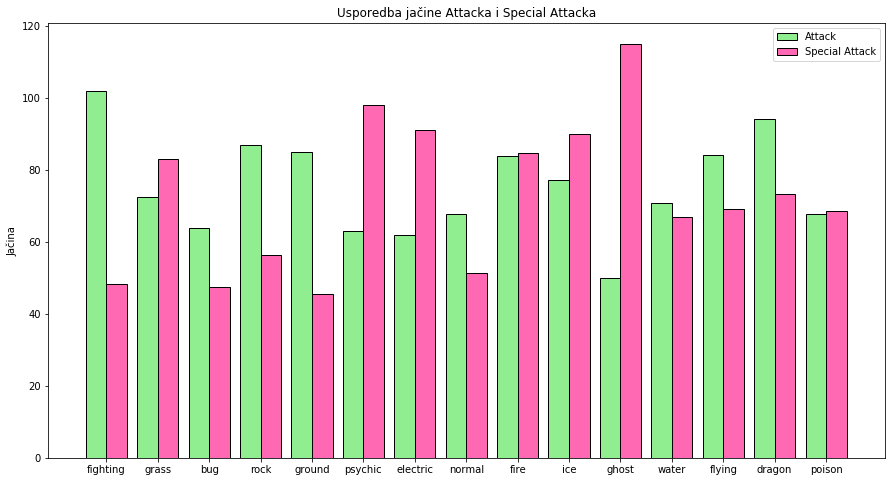

In [53]:
ind = np.arange(len(atk))
width = 0.4

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

at = ax.bar(ind, a_velicina, width, color='lightgreen',ec='black')
sp = ax.bar(ind+width, s_velicina, width, color='hotpink',ec='black')

ax.set_ylabel('Jačina')
ax.set_title('Usporedba jačine Attacka i Special Attacka')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ime)

ax.legend( (at[0], sp[0]), ('Attack', 'Special Attack') )

plt.show()

Kao što možemo vidjeti, većina tipova ima izraženu jednu vrstu napada u usporedbi s drugom. Tako su Psychic, Electic i Ghost većinom special napadači, a Fighting, Rock, Ground i Flying fizički napadači.

To je zato što su u početku (prve 3 generacije igrica) svi psihički i električni napadi (među ostalim) bili special, dok su borbeni, kameni, zemljani i leteći(među ostalim) bili fizički napadi. Zanimljivo, duhovni napadi su bili fizički, ali su kasnije očito promijenili da duhovi budu special napadači.

#### Korelacija između napada i posebnog napada

Text(0.5, 1.0, 'Korelacija')

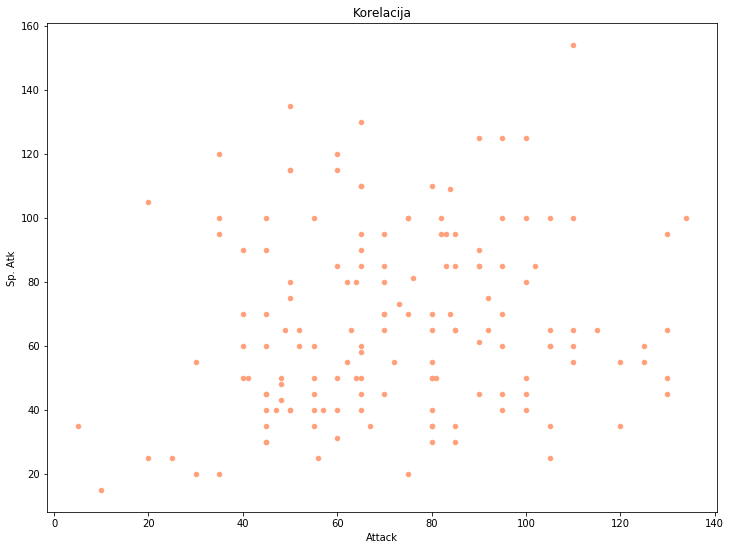

In [54]:
pokemon.plot.scatter(x='Attack', y='Sp. Atk', c='lightsalmon')
plt.title('Korelacija')

In [55]:
np.corrcoef(pokemon['Attack'], pokemon['Sp. Atk'])

array([[1.        , 0.14631223],
       [0.14631223, 1.        ]])

Scatter plot ne pokazuje čvrstu korelaciju između jačine napada pokemona i jačine posebnog napada, a i koeficijent korelacije je 0.146 što pokazuje jako slabu pozitivnu koreliranost.  
Dakle, napad i posebni napad su sasvim odvojeni.

### Korelacija između Special Attacka i Special Defensea

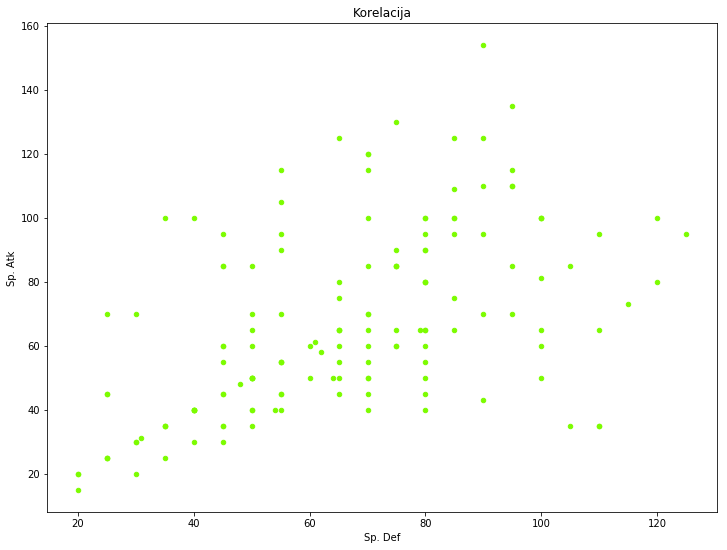

In [56]:
pokemon.plot.scatter(x='Sp. Def', y='Sp. Atk', c='lawngreen')
plt.title('Korelacija')
plt.show()

In [57]:
np.corrcoef(pokemon['Sp. Def'], pokemon['Sp. Atk'])

array([[1.        , 0.52290668],
       [0.52290668, 1.        ]])

Special Attack i Special Defence su karakteristike koje potječu od jedne karakteristike koja se zvala Special te kasnije razgranala u napad i obranu. S obzirom na to bilo je očekivati da će biti povezane, a dobili smo koeficijent korelacije 0.523 koji nam ukazuje na umjerenu pozitivnu koreliranost te možemo potvrditi da su stvarno donekle povezane.